# **DTSA5304 - Data Visualization Final Project**

The project uses unemployment rate data from 235 countries over 20 years (2001-2021). The primary goal is to help users explore and compare unemployment trends across different countries, with specific tasks including trend analysis over time, country comparisons, and geographic pattern identification. The intended audience is primarily government agencies and policy makers who need to understand global unemployment patterns. The key tasks involve allowing users to explore individual country trends, compare multiple countries, and understand geographic distributions of unemployment rates.

---

The project includes implementations of visualisation techniques for the unemployment dataset. The dataset can be found on Kaggle. The goal of this project is to demonstrate the following steps in a data visualization project:

1. Design preliminary low-fidelity prototypes for your dataset
2. Implement these visualization using Altair package
3. Conduct the evaluation of visualizations with at least 3 people

---

## **Part 1: Dataset, Evaluating Existing Visualizations and Goals**

#### **About the dataset**

This dataset is consists of the unemployment rate of every country from 1991-2021. It contains 235 rows and 33 columns. For simplicity, this project only considers years through 2001 to 2021 (otherwise the dataset becomes larger than 5000 rows when we transpose the dataframe, we will transpose in the following steps).

Link: https://www.kaggle.com/datasets/pantanjali/unemployment-dataset

Columns of dataset:

*   Country name
*   Country code
*   Years from 1991 to 2021 as seperate columns (each column contains the unemployement rate for the related year)

#### **Existing Visualizations**
I have looked at several websites with similar data. Most of them have lines graphs that plot rates over years and bar charts showing averages. Below you can find the Euro area seasonally-adjusted unemployment rates and visualisations. I think these visualizations are great at displaying change over time. However we might also try and add some interactivity to our charts so that the users can gain meaningful insights while comparing rates across different countries.

Example: https://ec.europa.eu/eurostat/web/products-euro-indicators/w/3-02122024-ap

#### **Goals**
The goal of this visualization project to provide an interactive visual report to the end users that allow them to search through different countries. The report should also let users compare one country with another.

*Let's start by downloading the data from Kaggle...*

In [14]:
# Dependencies
import kagglehub
import pandas as pd
import altair as alt
import warnings
import io
import requests
from vega_datasets import data

In [15]:
# Download the dataset from Kaggle
path = kagglehub.dataset_download("pantanjali/unemployment-dataset")
path = path + "/unemployment analysis.csv"

# Read csv and filter by sampling date
source = pd.read_csv(path)
source.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [16]:
# For simplicity, we will only use years from 2001 to 2021
source = source.drop(source.iloc[:, 2:12], axis=1)
source.head()

,Country Name,Country Code,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.73,7.96,7.79,7.31,7.12,6.99,6.74,6.27,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.81,11.26,11.14,10.99,11.22,11.10,11.30,11.09,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.87,4.78,4.75,4.73,4.73,4.65,4.63,4.60,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.00,3.96,3.96,3.92,3.88,3.86,3.82,3.79,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,18.58,17.90,16.99,16.31,15.97,15.63,15.97,13.06,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [17]:
# Use the function "melt" to transpose our table
source = source.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Unemployment Rate")
source[source['Country Code'] == 'USA'] # filter USA as an example

,Country Name,Country Code,Year,Unemployment Rate
222,United States,USA,2001,4.73
457,United States,USA,2002,5.78
692,United States,USA,2003,5.99
927,United States,USA,2004,5.53
1162,United States,USA,2005,5.08
1397,United States,USA,2006,4.62
1632,United States,USA,2007,4.62
1867,United States,USA,2008,5.78
2102,United States,USA,2009,9.25
2337,United States,USA,2010,9.63


## **Part 2: User Needs & Visualization**

#### **Tasks**
Now that we have our data ready we will identify the tasks. Then, we will answer the following questions to understand user needs.

**Task 1:** Plot a line graph to see how rate changes over time

**Task 2:** Display mean unemployment rates of 25 countries that have the highest overall unemployment rate

**Task 3:** Display rates on a map. Each country should display additional information when hovered over

*	**Why is a task pursued? (goal)**
<br> To gain insight about a country's unemployment rate over years and average unemployment rate
*	**How is a task conducted? (means)**
<br> Charts are provided as a summary and an interactive tooltip is shown when hovered over with a mouse
*	**What does a task seek to learn about the data? (characteristics)**
<br> Change of unemployment rate over years, countries with highest unemployment rates
*	**Where does the task operate? (target data)**
<br> Tasks plot Rate (%) over Time (Years) and also average rates across contries (geospatial information)
*	**When is the task performed? (workflow)**
<br> Annually
*	**Who is executing the task? (roles)**
<br> For this assignment friends and family 🙂 but an example in a professional setting could be people working in government agencies that could benefit from this kind of visualization

#### **Preliminary Sketches**
Considering the user needs above, here are some preliminary sketches for the visualizations:

1. A line graph showing multiple countries
2. A parallel coordinates chart showing all countries at once with a selection bar
3. A bar chart plotting mean unenmployement rates across countries
4. A Choropleth Map with interactive elements

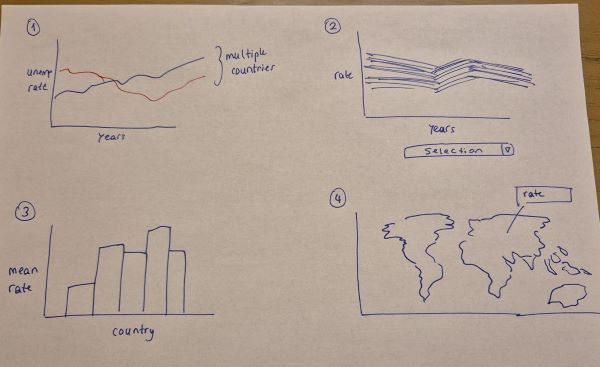

*Now let's move on with the visualizations...*

Let's try to plot each country. This will produce a very crowded line graph which is not easy to interpret.

In [18]:
warnings.filterwarnings('ignore')

# Unfortunately, Altair version in Google Collab does not support selection_point()
# selection = alt.selection_point(fields=['Country Name'], bind='legend')

line_all = alt.Chart(source).mark_line().encode(
    x='Year',
    y='Unemployment Rate',
    color=alt.Color("Country Name")
    #tooltip=['Country Name'],
    #opacity=alt.when(selection).then(alt.value(1)).otherwise(alt.value(0.2))
)

line_all

alt.Chart(...)

Instead, we can let the user choose which country they want to view. Unfortunately, Altair's version in Google Collab does not support the function selection_point(). For this assignment, I will assume the user selects 5 countries via a user-interface (such as a web application). Let's say the user selects **USA, Japan, New Zealand, Poland and Argentina**. With a simpler graph, we can even encode the names at the end of each line, which looks more intuitive. I also added circles for each data point and a tooltip that shows the details at each point (hover over with your mouse).

In [19]:
# For simplicity we will plot the rates of USA, Japan, New Zealand, Poland and Argentina
five_countries = source[source['Country Code'].isin(['USA', 'JPN', 'NZL', 'POL', 'ARG'])]

line = alt.Chart(five_countries).mark_line().encode(
    x='Year',
    y='Unemployment Rate',
    color=alt.Color("Country Name", legend=None)
)

circles = line.mark_circle().encode(
    x='Year',
    y='Unemployment Rate',
    tooltip=['Country Name', 'Country Code', 'Unemployment Rate', 'Year']
)

last_rate = line.mark_circle().encode(
    x=alt.X("last_year['Year']:O"),
    y=alt.Y("last_year['Unemployment Rate']:Q")
).transform_aggregate(
    last_year="argmax(Year)",
    groupby=["Country Name"]
)

company_name = last_rate.mark_text(align="left", dx=4).encode(text="Country Name")

chart_five = (line + circles + last_rate + company_name).encode(
    x=alt.X(title="Year"),
    y=alt.Y(title="Unemployment Rate")
).properties(
    title='Unemployment Rate Through Years'
    )

chart_five

alt.LayerChart(...)

Our next task is to calculate the mean unemployment rate for each country and plot a bar chart for 25 countries with the highest unemployment rate. The chart also includes a tooltip.

In [23]:
mean_rates = source.groupby(['Country Name','Country Code'],as_index=False)['Unemployment Rate'].mean()
mean_rates = mean_rates.sort_values(by=['Unemployment Rate'],ascending=False)
mean_rates = mean_rates.rename(columns={"Unemployment Rate": "Mean Unemployment Rate"})

top_25 = mean_rates.head(25)

bars = alt.Chart(top_25).mark_bar().encode(
    x = alt.X(field='Country Code', sort=alt.EncodingSortField(field='Mean Unemployment Rate', op='values')),
    y='Mean Unemployment Rate',
    tooltip=['Country Name', 'Country Code', 'Mean Unemployment Rate'],
    color=alt.Color('Mean Unemployment Rate', scale=alt.Scale(scheme='tealblues'))
    ).properties(
         title='Mean Unemployment Rate (Top 25 Countries)'
         )

bars

alt.Chart(...)

The final task is to draw a choropleth map with interactive elements. Users will be able to see mean unemployement rates on the map.

In [24]:
# Get country information from vega datasets
countries = alt.topo_feature(data.world_110m.url, 'countries')

# GitHub page contatining country ids (https://github.com/canonical/ubuntu.com/blob/main/static/js/data/world-110m-country-names.tsv)
# These id's will be used for the lookup function below
url = "https://raw.githubusercontent.com/canonical/ubuntu.com/refs/heads/main/static/js/data/world-110m-country-names.tsv"
s = requests.get(url).content
ids = pd.read_csv(io.StringIO(s.decode('utf-8')), sep='\t')

# Join ids with country names
mean_rates = mean_rates.merge(ids, how='left', left_on='Country Name', right_on='name')
mean_rates = mean_rates.drop(columns=['name'])
mean_rates.head()

,Country Name,Country Code,Mean Unemployment Rate,id
0,North Macedonia,MKD,28.832381,NaN
1,South Africa,ZAF,27.431429,710.0
2,Lesotho,LSO,27.343810,426.0
3,Djibouti,DJI,27.196667,262.0
4,Eswatini,SWZ,25.329524,NaN


In [25]:
# Draw the choropeth map
''' Possible projections
    "albers",
    "albersUsa",
    "azimuthalEqualArea",
    "azimuthalEquidistant",
    "conicEqualArea",
    "conicEquidistant",
    "equalEarth",
    "equirectangular",
    "gnomonic",
    "mercator",
    "naturalEarth1",
    "orthographic",
    "stereographic",
    "transverseMercator"
'''

map = alt.Chart(countries).mark_geoshape().encode(
      #shape='geo:G',
      color='Mean Unemployment Rate:Q',
      tooltip=['Country Name:N', 'Country Code:N', 'Mean Unemployment Rate:Q'],
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(data=mean_rates, key='id', fields=['Country Name', 'Country Code', 'Mean Unemployment Rate'])
    ).properties(
         width=1100,
         height=500,
         title='World Map'
    ).project(
        type='naturalEarth1'
    )

map

alt.Chart(...)

You'll notice some countries are missing. This is due to non-matching/missing rows in the vega dataset and the .tsv file we downloaded from GitHub.

## **Part 3: Evaluation**

To evaluate the visualizations, I've applied the frameworks we have discussed in the lectures.

**Target Question:** "How effective are the interactive visualizations in helping users understand and compare unemployment trends across different countries?"

**People Recruited:**
I've mentioned that people working in government agencies could find these visualizations useful. So, in an ideal setting government policy analysts, economic researchers and public sector data analysts could evaluate the charts and provide feedback. However, for this assignment, I asked my friends and family for feedback.

**Measures I Used to Evaluate the Visualizations:**
1. Insight Depth
- Number of comparative insights generated
- Complexity of patterns identified
- Quality of policy-relevant observations
2. Task Performance
- Time to complete specific analysis tasks
- Accuracy in identifying trends
- Success rate in country comparisons
3. Usability Metrics
- User satisfaction ratings
- Number of interaction errors

**Evaluation Approach:** I used a mix of methods such as task-based evaluation, think-aloud studies and semi-structured interviews.

**Method Implementation:**
To begin with, I asked participants to complete a set of specific tasks:
   - Compare unemployment rates between specific countries
   - Identify countries with highest/lowest rates
   - Analyze trends over time

Then, I asked about how they approached these tasks (think-aloud study). They answered questions about their experience and provided feedback on visualization effectiveness.

**Success Criteria:**
The visualization would be considered successful if:
1. Task Performance
- Users complete comparative analysis tasks with >90% accuracy
- Task completion time reduces after initial learning period
2. Insight Generation
- Users identify at least 3 meaningful patterns per visualization
- Users can articulate relationships between different views
3. User Confidence
- Users report high confidence in their insights
- Users can effectively explain findings to others

Overall, the evaluation focuses on both quantitative metrics and qualitative feedback to ensure the visualizations effectively support the intended analysis tasks.

**Areas of Improvement:**
From the feedback I received from my friends and collegues, here are some ares of improvement.
1. Interaction Enhancements:
- Add dynamic country selection in the line graph
- Implement brushing and linking between views
- Add temporal controls for the map view

2. Data Representation:
- Address missing country data in the map
- Add uncertainty visualization
- Include more comparative metrics

3. User Controls:
- Add customizable views and filtering options
- Implement data export capabilities
- Add search and annotation features

The current design successfully presents the core information but could benefit from enhanced interactivity and user control features to better support exploratory analysis and detailed comparisons. Future iterations should focus on these improvements while maintaining the current clarity and ease of use.

## **Summary**
To summarize, the unemployment visualization project presents three main visualization methods: **line graphs, bar charts, and a choropleth map**, each with distinct strengths and limitations.

**The line graph** effectively shows trends over time but becomes cluttered when displaying all countries simultaneously, demonstrating how visualization choices can significantly impact user comprehension. The modified version showing only five countries strikes a better balance between detail and clarity.

**The bar chart** of the top 25 countries clearly communicates aggregate statistics and rankings but might bias users toward focusing only on high unemployment rates. Hence, it might be useful to add horizontal line that shows the global average unemployment rate. This might allow users to compare top 25 countries with the rest of the world.

**The choropleth map** provides valuable geographical context through color encoding and interactive tooltips, though missing data for some countries limits its completeness.

I believe the current implementation effectively presents basic patterns through clean design and clear visual hierarchy but there's room for improvement in areas such as interactive filtering and comparative features. Enhanced interactivity, such as dynamic country selection and brushing and linking between views, could provide users with more flexibility in exploring the data while maintaining the clarity of the current design.

In [13]:
# Summary of charts
chart_five.properties(
         width=300,
         height=200
         ) | bars.properties(
         width=300,
         height=200
         ) | map.properties(
         width=300,
         height=200
         )

alt.HConcatChart(...)